## Importo librerias

In [144]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import cv2
from tqdm import tqdm
import random

### Si estoy usando windows

In [146]:
os.getcwd()

'C:\\Users\\MaxiCryptonita\\OneDrive\\proy__transfer_deep_learning'

In [147]:
DATADIR = os.getcwd() + "\\datasets\\PetImages"

In [148]:
CATEGORIES = ["Dog", "Cat", "Kimi"]

### Si estoy usando Mac

In [ ]:
DATADIR = "/Users/maximilianopona/Desktop/Proyectos/Streamlit_app/Datasets/kagglecatsanddogs_5340/PetImages" # MacOS

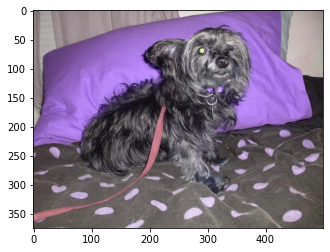

In [149]:
for category in CATEGORIES:  # do dogs and cats
    path = os.path.join(DATADIR,category)  # create path to dogs and cats
    for img in os.listdir(path):  # iterate over each image per dogs and cats
        img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_COLOR)  # convert to array
        plt.imshow(img_array)  # graph it
        plt.show()  # display!
        break  # we just want one for now so break
    break  #...and one more!

In [150]:
IMG_SIZE = 160

In [152]:
new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))

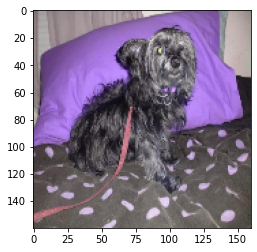

In [153]:
plt.imshow(new_array)

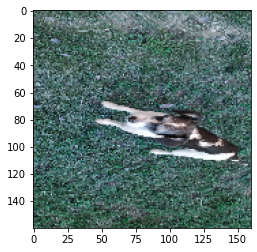

In [159]:
plt.imshow(training_data[24000][0])

In [31]:
training_data = []

def create_training_data():
    for category in CATEGORIES:  # do dogs and cats
        path = os.path.join(DATADIR,category)  # create path to dogs and cats
        class_num = CATEGORIES.index(category) # creamos los labels
        for img in os.listdir(path):  # iterate over each image per dogs and cats
            try:
                img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_COLOR)  # convert to array
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
                training_data.append([new_array, class_num])
            except Exception as e:
                pass

In [32]:
create_training_data()

In [119]:
random.seed(7) # Seteamos una semilla para que los resultados sean replicables
random.shuffle(training_data)

In [121]:
for sample in training_data[0:10]:
    print(sample[1])

0
0
1
1
0
0
0
0
0
0


In [123]:
X = []
y = []

In [124]:
for features, label in training_data:
    X.append(features)
    y.append(label)

X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 3)

In [138]:
import pickle

pickle_out = open("training_examples.pickle", "wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("training_labels.pickle", "wb")
pickle.dump(y, pickle_out)
pickle_out.close()